# Resizing Images and Videos

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt

In [6]:
def resize_frame(frame, scale):
    shape = frame.shape
    height = int(shape[0] * scale)
    width = int(shape[1] * scale)

    dims = (width, height)

    # Use cv.INTER_AREA when shrinking the image and cv.INTER_LINEAR or cv.INTER_CUBIC for expanding.
    return cv.resize(frame, dims, interpolation=cv.INTER_AREA)

### Resizing Image

In [30]:
img = cv.imread('Photos/cat.jpg', 1)
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_shape = img.shape
print(f'Shape of original Image: {img_shape}')

Shape of original Image: (427, 640, 3)


In [33]:
img_resized = resize_frame(img, 0.5)
image_resized_rgb = cv.cvtColor(img_resized, cv.COLOR_BGR2RGB)
print(f'Shape of resized Image: {img_resized.shape}')

Shape of resized Image: (213, 320, 3)


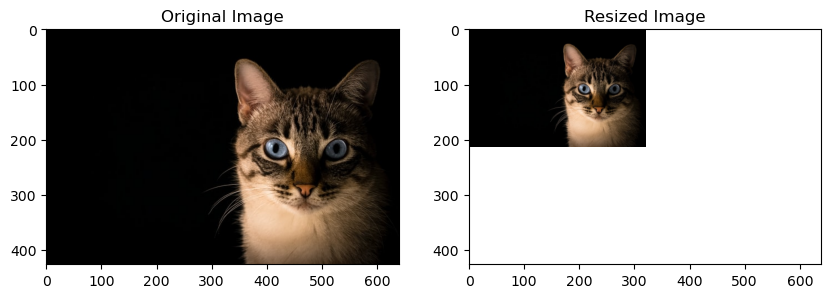

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].set_xlim([0, img_shape[1]-1])
axs[0].set_ylim([img_shape[0]-1, 0])

axs[1].imshow(image_resized_rgb, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Resized Image')
axs[1].set_xlim([0, img_shape[1]-1])
axs[1].set_ylim([img_shape[0]-1, 0])

plt.show()

### Resizing Video

In [48]:
capture = cv.VideoCapture('Videos/dog.mp4')
fps = capture.get(cv.CAP_PROP_FPS)
print(f'Frames per second: {fps}')

Frames per second: 29.97002997002997


In [42]:
delay_ms = int((1/fps) * 1000)   # Delay between frames
while True:
    isTrue, frame = capture.read()
    if isTrue:
        resized_frame = resize_frame(frame, 0.5)
        cv.imshow('Original Video', frame)
        cv.imshow('Resized Video', resized_frame)
        if (cv.waitKey(delay_ms) & 0xFF) == ord('d'):
            break
    else:
        break
cv.destroyAllWindows()
capture.release()   # Releases the resources allocated to the video capture object

### Resizing a live video

In [61]:
capture2 = cv.VideoCapture(0)   # 0 for webcam 
fps2 = capture2.get(cv.CAP_PROP_FPS)
print(f'Frames per second: {fps2}')

Frames per second: 30.0


In [63]:
delay_ms2 = int((1/fps2) * 1000)   # Delay between frames
new_width = 300
new_height = 200
capture2.set(3, new_width)     # Set width by giving flag = 3
capture2.set(4, new_height)     # Set height by giving flag = 4

while True:
    isTrue, frame = capture2.read()
    if isTrue:
        cv.imshow('Resized Video', frame)
        if (cv.waitKey(delay_ms2) & 0xFF) == ord('d'):
            break
    else:
        break
cv.destroyAllWindows()

In [66]:
capture2.release()   # Releases the resources allocated to the video capture object